# Nuclear Properties

Here we explore how to access some of the nuclear properties from a {py:obj}`Nucleus <pynucastro.nucdata.nucleus.Nucleus>` object.

```{note}
pynucastro gets the nuclear data from the Nubase 2020 compilation, which uses the CODATA 2018
constants.  To be consistent, the CODATA 2018 values of the atomic mass unit and neutron
mass are provided in `pynucastro.constants` as `constants.m_u_MeV_C18` and `constants.m_n_MeV_C18`
```

In [1]:
from pynucastro import Nucleus

## `Nucleus`

The `Nucleus` class manages all of the properties of a nucleus.  We create a `Nucleus` simply by giving the name of the isotope

In [2]:
he4 = Nucleus("he4")

````{tip}
Nuclei names are case-insensitive and the atomic weight can come before or after the element name.
All of these are equivalent:
```
Nucleus("ni56")
Nucleus("Ni56")
Nucleus("56ni")
```

````

From this we can access the member data:

* `Z`, `N`, `A` : the atomic number, neutron number, and atomic mass
* `mass` : the mass of the nucleus in MeV
* `dm` : the mass excess of the nucleus in MeV
* `nucbind` : the nuclear binding energy of the nucleus in MeV / nucleon
* `A_nuc` : the mass number of the nucleus (`mass` / atomic mass unit)
* `tau` : the halflife of the nucleus (in seconds)

In [3]:
he4.Z, he4.A

(2, 4)

In [4]:
he4.nucbind

7.073915614499924

In [5]:
ni56 = Nucleus("ni56")

In [6]:
ni56.tau

524880.0

In [7]:
ni56.spin_states

1

We can also look at a summary:

In [8]:
ni56.summary()

Ni56 / nickel-56
----------------
  A: 56
  N: 28
  Z: 28

  mass: 52109.76214 MeV
  mass excess: -53.90760 MeV
  binding energy / nucleon: 8.64278 MeV

  half-life: 524880.0 s

  partition function: available
  spin states: 1

  dummy: False
  nse: False
  spin states are reliable: True


```{tip}
The helper function {py:func}`get_nuclei_in_range <pynucastro.nucdata.nucleus.get_nuclei_in_range>` can
be used to get a list of nuclei in a range based on $Z$, $A$ or neutron excess,
```

## `Nucleus` math

We can also create a `Nucleus` via addition and subtraction operations.

In [9]:
c12 = Nucleus("c12")
p = Nucleus("p")
n13 = c12 + p
n13

N13

In [10]:
n13.mass

12114.76881146

In [11]:
c12 - p

B11

## Exploring properties

Let's look at some nuclei and look at their mass excess, mass, and binding energies

In [12]:
p = Nucleus("p")
n = Nucleus("n")
c12 = Nucleus("c12")
ne22 = Nucleus("ne22")
ti43 = Nucleus("ti43")
fe56 = Nucleus("fe56")

In [13]:
for nuc in [p, n, c12, ne22, ti43, fe56]:
    print(f"{str(nuc):6} {nuc.dm:15.8} {nuc.mass:15.8f} {nuc.nucbind:15.8f}")

p            7.2889711    938.78307348      0.00000000
n            8.0713181    939.56542052      0.00000000
C12                0.0  11177.92922904      7.68014458
Ne22         -8.024716  20484.84553724      8.08046563
Ti43           -29.316  40024.93040406      8.35281497
Fe56         -60.60716  52103.06257552      8.79035626


We see that the binding energy for protons and neutrons are zero, as expected.

We also see:

* For ${}^{12}\mathrm{C}$ the binding energy compares well with the tablulated version from the rounded AME 2020 of `7680.145`.

* For ${}^{22}\mathrm{Ne}$ the binding energy compares well with the tablulated version from the rounded AME 2020 of `8080.466`.

* For ${}^{43}\mathrm{Ti}$ the binding energy compares well with the tablulated version from the rounded AME 2020 of `8352.81`.

* For ${}^{56}\mathrm{Fe}$ the binding energy compares well with the tablulated version from the rounded AME 2020 of `8790.356`.

In [14]:
from pynucastro.constants import constants

We also see that the mass of ${}^{12}\mathrm{C}$ agrees with the atomic mass unit from the CODATA compilation:

In [15]:
c12.mass / 12 - constants.m_u_MeV_C18

1.1368683772161603e-13

Let's look at a less common nucleus. From Nubase 2020 data, the spin for ${}^{61}\mathrm{Fe}$ is determined experimentally but the argument to determine it was judged to be weak. We are able to choose whether to use these unreliable spin data or omit them. 

In [16]:
fe61 = Nucleus("fe61")
if fe61.spin_reliable:
    print(f"{str(fe61)}: {fe61.spin_states} spin states")
else:
    print(f"{str(fe61)}: {fe61.spin_states} spin states (not strongly experimentally substantiated. Consider dropping {str(fe61)} from your network.)")

Fe61: 4 spin states (not strongly experimentally substantiated. Consider dropping Fe61 from your network.)


## Partition functions

`Nucleus` objects also have their partition function data (managed by {py:obj}`PartitionFunction <pynucastro.nucdata.partition_function.PartitionFunction>`.  These come from the work of {cite:t}`rauscher:1997` for low temperatures ($T \le 10^{10}~\mathrm{K}$) and {cite:t}`rauscher:2003` for high temperatures.  The data from these two sources is concatenated and a spline fit is used to evaluate it.

We can use {py:meth}`eval <pynucastro.nucdata.partition_function.PartitionFunction.eval>` to evaluate the partition function at any temperature.

In [17]:
ne20 = Nucleus("ne20")
ne20.partition_function.eval(4.e9)

1.043747

And we can also plot it vs. temperature

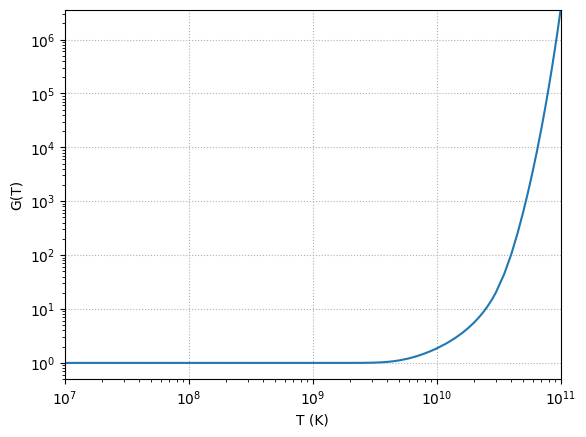

In [18]:
fig = ne20.partition_function.plot()